In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analysis_data_filepath = "/project/pi_cberger_smith_edu/nlsigma_data_arccos/"
source_data_filepath = "/work/pi_cberger_smith_edu/data_QL_L180_arccos/"#QL_L180/"#systematics/"
analyzer = LatticeData(datadir = analysis_data_filepath, use_full_filepath = True)

## Collect Data

In [3]:
analyzer.copy_data_from_directory(source_data_filepath)

run not yet complete
L_180_beta_1.600000_itheta_0.392699_ntherm_0_nMC_10000_freq_1
Status: 8963 lines written
run not yet complete
L_180_beta_1.600000_itheta_0.785398_ntherm_0_nMC_10000_freq_1
Status: 9353 lines written
run not yet complete
L_180_beta_1.600000_itheta_1.178097_ntherm_0_nMC_10000_freq_1
Status: 1986 lines written
run not yet complete
L_180_beta_1.600000_itheta_1.570796_ntherm_0_nMC_10000_freq_1
Status: 8254 lines written


## Basic statistics

In [4]:
df = analyzer.get_data()

In [5]:
df.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,32400.0,-30.000006,-31924.350182,-31924.350182,-0.001801,-0.001541,0.00195,0.662809,14.0,...,53,545,545,1,7.504264,-8.221795,0.001086,-0.01188,0.060561,0.066352
1,1,32400.0,-37.000014,-40823.217516,-40823.217516,0.000462,-0.001541,0.00195,0.587361,34.0,...,53,545,545,1,4.164192,3.800775,0.001086,-0.01188,0.131006,-0.119572
2,2,32400.0,-1.000011,-46116.565430,-46116.565430,0.002276,-0.001541,0.00195,0.538714,43.0,...,53,545,545,1,9.242638,8.436015,0.001086,-0.01188,0.059023,-0.053872
3,3,32400.0,-17.000009,-49368.175894,-49368.175894,0.002618,-0.001541,0.00195,0.505980,68.0,...,53,545,545,1,9.912761,9.047655,0.001086,-0.01188,0.055033,-0.050230
4,4,32400.0,-9.000019,-51978.551482,-51978.551482,0.002563,-0.001541,0.00195,0.479858,104.0,...,53,545,545,1,9.808082,8.952113,0.001086,-0.01188,0.055621,-0.050767


In [6]:
df["itheta"].unique()

array([0.])

In [7]:
df_stats = analyzer.do_stats(therm_frac = 0.1)

In [8]:
df_stats.head()

,length,itheta,beta,nMC,ntherm,freq,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,...,acc_std,corr_length_Re_std,corr_length_Im_std,F_Re_py_std,F_Im_py_std,mass_gap_Re_std,mass_gap_Im_std,time (sec),time (min),time (hr)
0,180.0,0.0,1.6,10000.0,0.0,1.0,32400.0,0.670168,-67063.191197,-67063.191197,...,0.000852,4.497194,4.104715,0.0,0.0,0.000917,0.000837,121257.0,2020.95,33.6825


# Observable quick plots (seaborn)

### Q_L

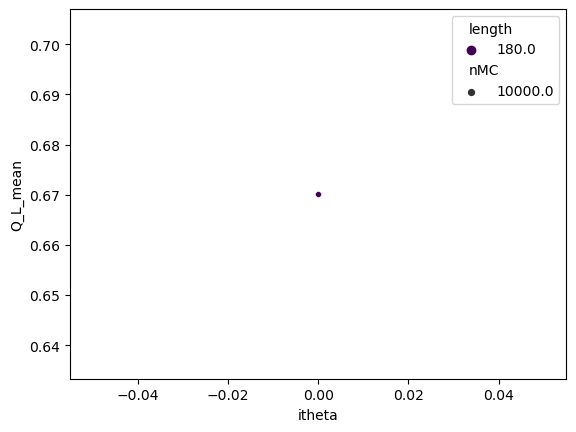

In [9]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Q_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### S_L

In [10]:
# sns.scatterplot(data = df_stats, x = "itheta", y = "S_L_mean", hue = "length", 
#                 size = "nMC", palette = analyzer.palette)
# plt.show()

### Xi_L

In [11]:
# sns.scatterplot(data = df_stats, x = "itheta", y = "Xi_L_mean", hue = "length", 
#                 size = "nMC", palette = analyzer.palette)
# plt.show()

### F_L Re

In [12]:
# sns.scatterplot(data = df_stats, x = "itheta", y = "F_LRe_mean", hue = "length", 
#                 size = "nMC", palette = analyzer.palette)

# plt.show()

In [13]:
F_L_Re_df = df_stats.filter(["F_LRe_mean","F_Re_py_mean"])
F_L_Re_df.rename(columns = {"F_LRe_mean":"C++","F_Re_py_mean":"Python"},inplace = True)
F_L_Re_df.columns.name = 'Source'
F_L_Im_df = df_stats.filter(["F_LIm_mean","F_Im_py_mean"])
F_L_Im_df.rename(columns = {"F_LIm_mean":"C++","F_Im_py_mean":"Python"},inplace = True)
F_L_Im_df.columns.name = 'Source'
F_L_Re_df = F_L_Re_df.stack()
F_L_Im_df = F_L_Im_df.stack()
F_L_Re_df.name = "F_L"
F_L_Re_df = F_L_Re_df.to_frame()
F_L_Im_df.name = "F_L"
F_L_Im_df = F_L_Im_df.to_frame()
F_L_Im_df.head()

F_L
  Source         
0 C++     0.00195
  Python -0.01188

In [14]:
F_L_df = F_L_Re_df.join(F_L_Im_df, lsuffix = "_Re", rsuffix = "_Im")

In [15]:
F_L_df.head()

F_L_Re   F_L_Im
  Source                   
0 C++    -0.001541  0.00195
  Python  0.001086 -0.01188

## Correlation Length

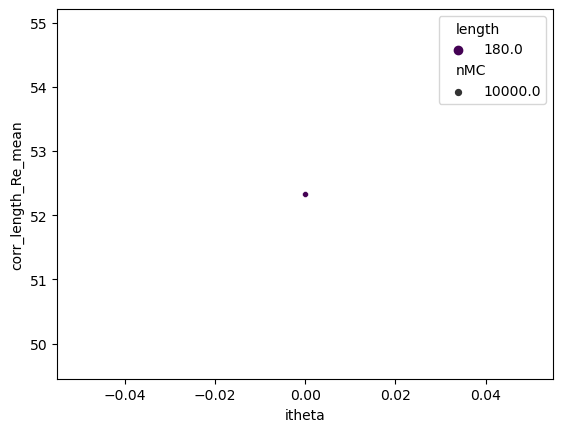

In [16]:
sns.scatterplot(data = df_stats, x = "itheta", y = "corr_length_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

### Mass Gap

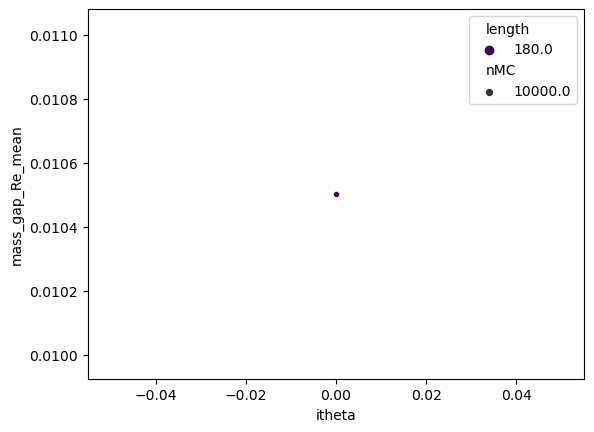

In [17]:
sns.scatterplot(data = df_stats, x = "itheta", y = "mass_gap_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

# Observable detailed plots with error (matplotlib)

In [18]:
lengths = df_stats["length"].unique()
print(lengths)
colors = sns.color_palette("Blues", len(lengths))
observable = "Q_L"

[180.]


In [19]:
df_stats[df_stats["length"]==180].head(10)

,length,itheta,beta,nMC,ntherm,freq,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,...,acc_std,corr_length_Re_std,corr_length_Im_std,F_Re_py_std,F_Im_py_std,mass_gap_Re_std,mass_gap_Im_std,time (sec),time (min),time (hr)
0,180.0,0.0,1.6,10000.0,0.0,1.0,32400.0,0.670168,-67063.191197,-67063.191197,...,0.000852,4.497194,4.104715,0.0,0.0,0.000917,0.000837,121257.0,2020.95,33.6825


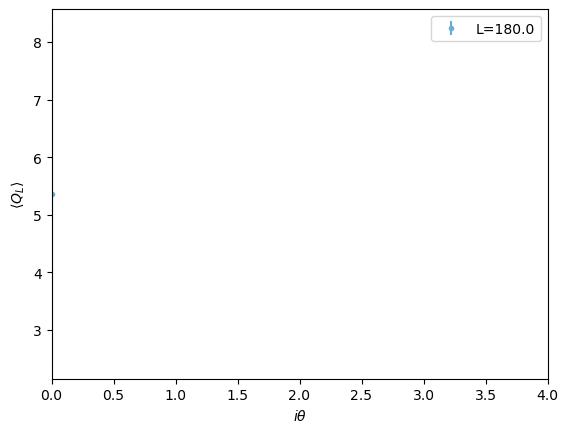

In [20]:
for n,length in enumerate(lengths):
    x,y,err = analyzer.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 0, freq = 1)
    plt.errorbar(x, 8.*y , yerr = err, marker = ".", ls = "none", color = colors[n], label ="L="+str(length))
plt.legend()
plt.xlim([0.0,4.0])
plt.xlabel(r"$i\theta$")
plt.ylabel(r"$\langle Q_L \rangle $")
#plt.title(observable)
plt.savefig("../Figs_README/Q_L_preliminary.jpg", format = "jpg")
plt.show()

## Recreating Alles et al

In [21]:
analysis_data_filepath = "/project/pi_cberger_smith_edu/nlsigma_data_arcsin/"#arccos/"
source_data_filepath = "/work/pi_cberger_smith_edu/data_QL_L180/"#_arccos/"#QL_L180/"#systematics/"
alles_data_filepath = "/project/pi_cberger_smith_edu/alles_et_al/"

analyzerL180 = LatticeData(datadir = analysis_data_filepath, use_full_filepath = True)
analyzerL180.copy_data_from_directory(source_data_filepath)

run not yet complete
L_180_beta_1.600000_itheta_0.785398_ntherm_0_nMC_10000_freq_1
Status: 1994 lines written


In [22]:
dfL180 = analyzerL180.get_data()
df_statsL180 = analyzerL180.do_stats(therm_frac = 0.1)

In [23]:
colorsL180 = sns.color_palette("Blues", 2)
observable = "Q_L"

In [24]:
df_statsL180.head()

,length,itheta,beta,nMC,ntherm,freq,|phi|_mean,Q_L_mean,A_L_mean,S_L_mean,...,acc_std,corr_length_Re_std,corr_length_Im_std,F_Re_py_std,F_Im_py_std,mass_gap_Re_std,mass_gap_Im_std,time (sec),time (min),time (hr)
0,180.0,0.000000,1.6,10000.0,0.0,1.0,32400.0,-0.056889,-67076.638479,-67076.638479,...,0.000895,5.498848,4.949502,0.0,0.0,0.001787,0.001608,231392.0,3856.533333,64.275556
1,180.0,0.392699,1.6,10000.0,0.0,1.0,32400.0,4.829222,-67088.996880,-67090.893312,...,0.000884,3.474330,1.963145,0.0,0.0,0.024691,0.013951,390898.0,6514.966667,108.582778
2,180.0,1.178097,1.6,10000.0,0.0,1.0,32400.0,12.541444,-67012.041765,-67026.816806,...,0.000814,0.365706,2.608762,0.0,0.0,0.002032,0.014494,75404.0,1256.733333,20.945556
3,180.0,1.570796,1.6,10000.0,0.0,1.0,32400.0,18.171000,-66958.182664,-66986.725605,...,0.001068,2.222081,3.006684,0.0,0.0,0.007135,0.009654,163078.0,2717.966667,45.299444
4,180.0,1.963495,1.6,10000.0,0.0,1.0,32400.0,27.268889,-66847.812475,-66901.354813,...,0.001046,0.003499,1.569087,0.0,0.0,0.000003,0.001361,91077.0,1517.950000,25.299167


In [25]:
df_alles = pd.read_csv(alles_data_filepath+"QL_plot_data.csv")

In [26]:
df_alles.rename(columns = {"x":"itheta","y":"Q_L_mean"},inplace=True)
df_alles["Q_L_std"] = 0.0
df_alles["type"] = "Alles"

In [27]:
df_alles.head()

,itheta,Q_L_mean,Q_L_std,type
0,0.597462,24.951259,0.0,Alles
1,0.497775,20.850330,0.0,Alles
2,0.099208,4.534258,0.0,Alles
3,0.195842,7.429891,0.0,Alles
4,0.299153,12.605223,0.0,Alles


In [28]:
df_plot = df_statsL180[["itheta","Q_L_mean","Q_L_std"]]

In [29]:
df_plot["type"] = "Berger"

/tmp/ipykernel_1042132/1070120515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["type"] = "Berger"


In [30]:
df_plot = pd.concat([df_plot,df_alles])

In [31]:
df_plot.head()

,itheta,Q_L_mean,Q_L_std,type
0,0.000000,-0.056889,3.137103,Berger
1,0.392699,4.829222,2.761403,Berger
2,1.178097,12.541444,3.801242,Berger
3,1.570796,18.171000,4.355007,Berger
4,1.963495,27.268889,5.099883,Berger


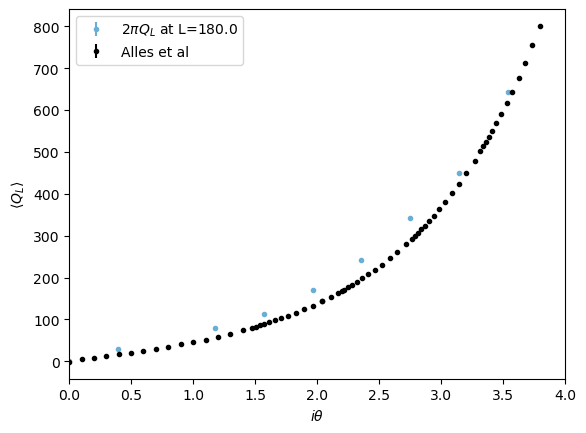

In [37]:
for n,length in enumerate(lengths):
    x,y,err = analyzerL180.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 0, freq = 1)
    plt.errorbar(x, 2*np.pi*y , yerr = err, marker = ".", ls = "none", color = colors[n], label =r"$2\pi Q_{L}$ at L="+str(length))
    plt.errorbar(df_alles["itheta"], df_alles["Q_L_mean"] , yerr = df_alles["Q_L_std"], marker = ".", ls = "none", color = "black", label ="Alles et al")
plt.legend()
plt.xlim([0.0,4.0])
plt.xlabel(r"$i\theta$")
plt.ylabel(r"$\langle Q_L \rangle $")
#plt.title(observable)
plt.savefig("../Figs_README/Q_L_comparison.jpg", format = "jpg")
plt.show()